<a href="https://colab.research.google.com/github/MoMahmoud8/VGG16-and-AlexNet-CNN-Architecture/blob/main/VGG16_and_AlexNet_CNN_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense,Input
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten
from keras import backend as k
from matplotlib import pyplot as pt
from tensorflow.keras import Sequential 
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()


In [ ]:

print("x_train= ", x_train.shape, "  y_train= ",y_train.shape)
print("x_test= ", x_test.shape, "  y_test= ",y_test.shape)
print(x_train.shape[2])

x_train=  (60000, 28, 28)   y_train=  (60000,)
x_test=  (10000, 28, 28)   y_test=  (10000,)
28


In [ ]:

#reshape train data and test data
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [ ]:


#convert from int to float
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

#normalizing the value of pixels of images
x_train /=255
x_test /=255

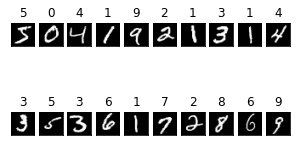

In [ ]:
fig=pt.figure(figsize=(5,3))
for i in range(20):
  ax=fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_train[i]),cmap='gray')
  ax.set_title(y_train[i])

In [ ]:
img_shape=x_train.shape[1:]
print(x_train.shape[1:])

(28, 28, 1)


In [ ]:

# model=Sequential()
# model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=img_shape))
# model.add(MaxPool2D(pool_size=(2,2)))
# #model.add(Dropout(0.85))
# model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))
# #to prevent overfitting
# #model.add(Dropout(0.5))
# model.add(Flatten())
# #model.add(Dense(500,activation='relu'))
# model.add(Dense(300,activation='relu'))
# #model.add(Dropout(0.85))
# model.add(Dense(10,activation='softmax'))

VGG16 implementaion

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=img_shape,filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2), padding="same",strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2), padding="same",strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2), padding="same",strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2), padding="same",strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=10, activation="softmax"))

In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_32 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_33 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_34 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                 

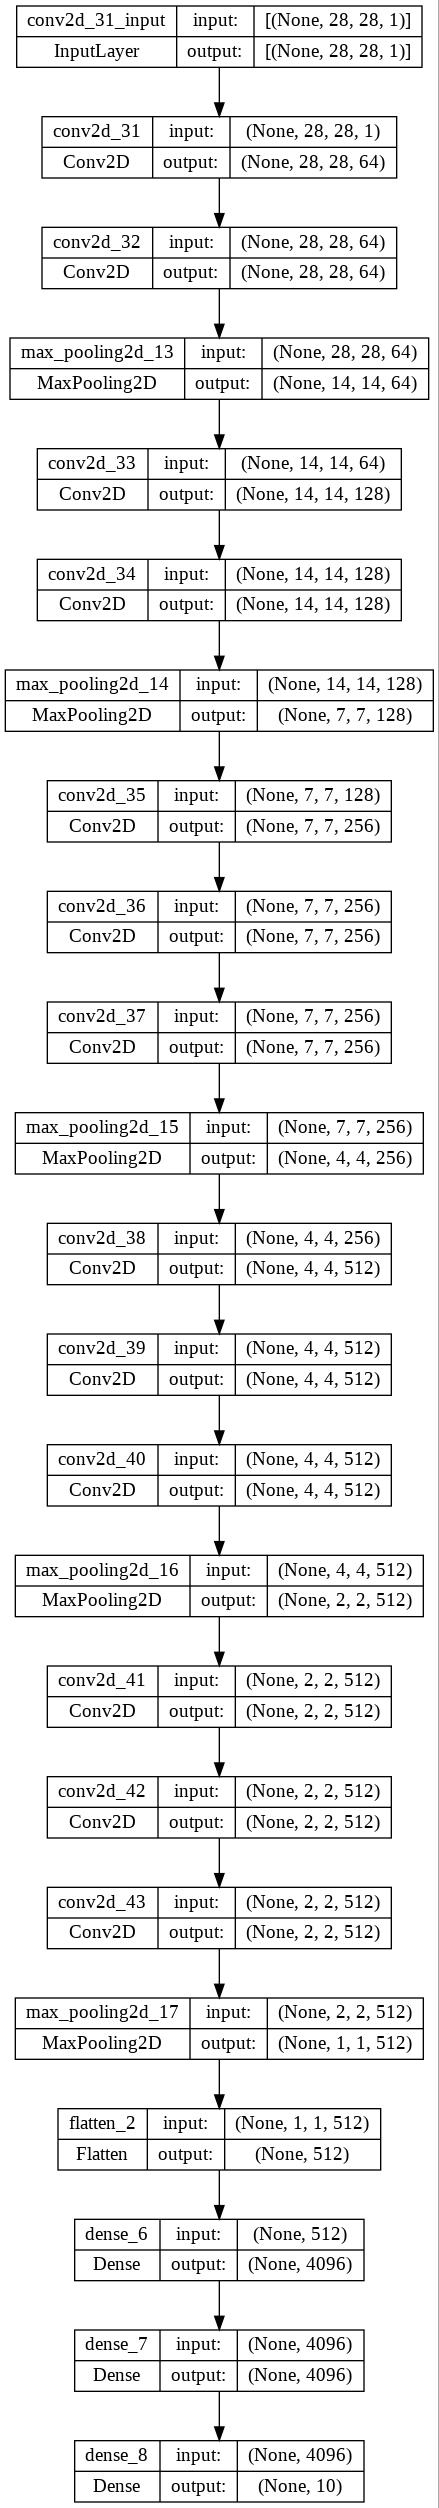

In [ ]:
plot_model(model, 'model.jpg',show_shapes='true')


In [ ]:
from tensorflow.keras.optimizers import SGD
opt=SGD(learning_rate=0.01)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=19,batch_size=128,shuffle=True)
loss,accuracy=model.evaluate(x_test,y_test,verbose=0)
print(F'accuracy:{accuracy*100}' )

Epoch 1/19
469/469 [==============================] - 29s 60ms/step - loss: 2.3017 - accuracy: 0.1123
Epoch 2/19
469/469 [==============================] - 28s 60ms/step - loss: 2.3011 - accuracy: 0.1124
Epoch 3/19
469/469 [==============================] - 27s 59ms/step - loss: 2.3009 - accuracy: 0.1124
Epoch 4/19
469/469 [==============================] - 28s 59ms/step - loss: 2.3007 - accuracy: 0.1124
Epoch 5/19
469/469 [==============================] - 28s 59ms/step - loss: 2.3006 - accuracy: 0.1124
Epoch 6/19
469/469 [==============================] - 28s 59ms/step - loss: 2.3004 - accuracy: 0.1124
Epoch 7/19
469/469 [==============================] - 28s 59ms/step - loss: 2.3000 - accuracy: 0.1124
Epoch 8/19
469/469 [==============================] - 28s 59ms/step - loss: 2.2994 - accuracy: 0.1124
Epoch 9/19
469/469 [==============================] - 28s 59ms/step - loss: 2.2983 - accuracy: 0.1124
Epoch 10/19
469/469 [==============================] - 28s 60ms/step - loss: 2.295

AlexNet implemention

In [ ]:
model2 = Sequential()
model2.add(Conv2D(input_shape=img_shape,filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model2.add(MaxPool2D(pool_size=(2,2), padding="same",strides=(2,2)))

model2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(MaxPool2D(pool_size=(2,2), padding="same",strides=(2,2)))

model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model2.add(MaxPool2D(pool_size=(2,2), padding="same",strides=(2,2)))


model2.add(Flatten())

model2.add(Dense(units=4096,activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(units=4096,activation="relu"))
model2.add(Dropout(0.5))
model2.add(Dense(units=10, activation="softmax"))

In [ ]:
model2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 7, 7, 256)         295168    
                                                                 
 conv2d_29 (Conv2D)          (None, 7, 7, 256)        

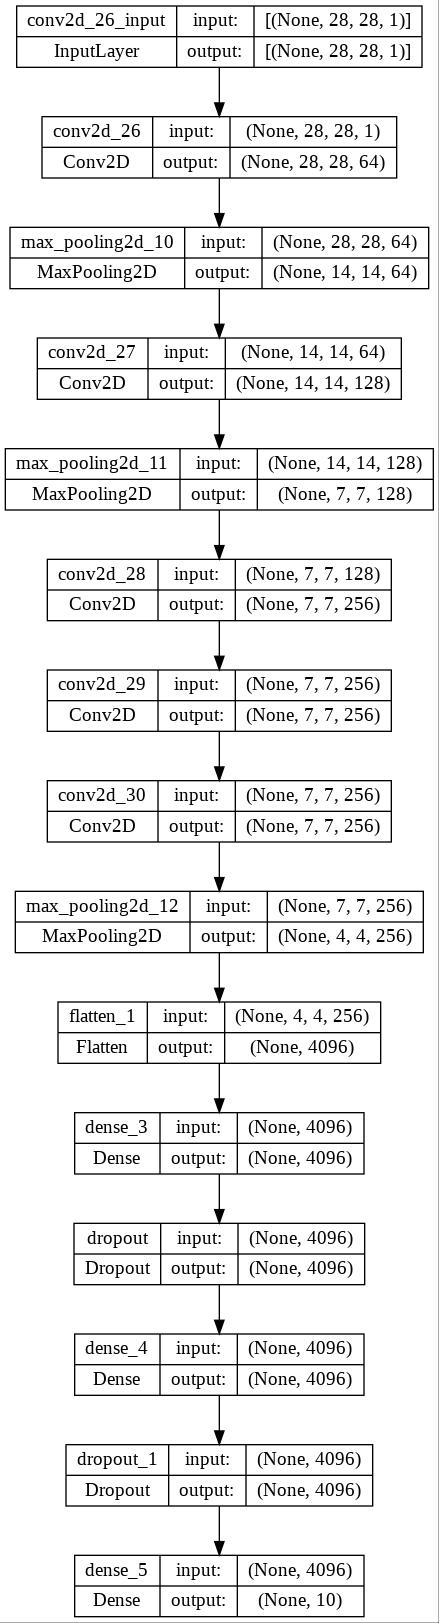

In [ ]:
plot_model(model2, 'model.jpg',show_shapes='true')


In [ ]:
from tensorflow.keras.optimizers import SGD
opt=SGD(learning_rate=0.01)
model2.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model2.fit(x_train,y_train,epochs=19,batch_size=128,shuffle=True)
loss,accuracy=model2.evaluate(x_test,y_test,verbose=0)
print(F'accuracy:{accuracy*100}' )

Epoch 1/19
469/469 [==============================] - 13s 25ms/step - loss: 2.2553 - accuracy: 0.2649
Epoch 2/19
469/469 [==============================] - 12s 26ms/step - loss: 0.7278 - accuracy: 0.7753
Epoch 3/19
469/469 [==============================] - 12s 26ms/step - loss: 0.2548 - accuracy: 0.9189
Epoch 4/19
469/469 [==============================] - 12s 25ms/step - loss: 0.1782 - accuracy: 0.9442
Epoch 5/19
469/469 [==============================] - 12s 25ms/step - loss: 0.1408 - accuracy: 0.9559
Epoch 6/19
469/469 [==============================] - 12s 25ms/step - loss: 0.1202 - accuracy: 0.9622
Epoch 7/19
469/469 [==============================] - 12s 25ms/step - loss: 0.1046 - accuracy: 0.9669
Epoch 8/19
469/469 [==============================] - 12s 25ms/step - loss: 0.0924 - accuracy: 0.9702
Epoch 9/19
469/469 [==============================] - 12s 25ms/step - loss: 0.0847 - accuracy: 0.9732
Epoch 10/19
469/469 [==============================] - 12s 25ms/step - loss: 0.075